# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Nola Agnesa
- **Email:** agnesanola01@gmail.com
- **ID Dicoding:** MC223D5X0843

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi penyewaan sepeda sepanjang hari, dan apakah terdapat perbedaan antara hari kerja dan akhir pekan?
- Bagaimana pengaruh kondisi cuaca terhadap jumlah penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [4]:
!pip install streamlit

In [6]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import datetime

import warnings
warnings.filterwarnings('ignore')

import streamlit as st

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Data Wrangling

### Gathering Data

In [7]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np

path_day = '/content/drive/MyDrive/submission/data/day.csv'
path_hour = '/content/drive/MyDrive/submission/data/hour.csv'

df_day = pd.read_csv(path_day)
df_hour = pd.read_csv(path_hour)

print("Dataset Day:")
print(df_day.head(), "\n")

print("Dataset Hour:")
print(df_hour.head(), "\n")

print("Statistik Deskriptif Dataset Day:")
print(df_day.describe(), "\n")

print("Statistik Deskriptif Dataset Hour:")
print(df_hour.describe(), "\n")

Mounted at /content/drive
Dataset Day:
   instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562

**Insight:**

Kelengkapan Data:
- Tidak ada missing values di kedua dataset (day dan hour), sehingga data sudah lengkap dan siap untuk dianalisis lebih lanjut.

Rentang Waktu dan Frekuensi Data:
- Dataset Day mencakup 731 hari (sekitar dua tahun), sedangkan dataset Hour mencakup 17.379 data per jam.
- Hal ini memungkinkan analisis di level harian maupun per jam untuk melihat pola penyewaan secara lebih mendetail.

Distribusi Penyewaan Harian:
- Rata-rata total penyewaan harian (kolom cnt) sekitar 4504 dengan variasi yang cukup besar (nilai minimum 22 dan maksimum 8714).
- Fluktuasi yang tinggi ini menunjukkan adanya perbedaan signifikan antar hari yang bisa jadi dipengaruhi oleh faktor seperti hari kerja, akhir pekan, atau kondisi cuaca.

Perbandingan Pengguna Terdaftar dan Kasual:
- Pada data harian, rata-rata pengguna terdaftar mencapai sekitar 3656 sedangkan pengguna kasual hanya sekitar 848.
- Insight ini menunjukkan bahwa mayoritas penyewaan datang dari pengguna terdaftar, yang bisa menjadi fokus strategi retensi dan loyalty.

Kondisi Cuaca dan Temperatur:
- Variabel temp dan atemp (temperatur dan suhu terasa) sudah dinormalisasi dengan rata-rata mendekati 0.5, dan weathersit didominasi oleh nilai rendah (1 atau 2), menandakan sebagian besar hari memiliki kondisi cuaca yang baik.
- Analisis lebih lanjut bisa mengungkap apakah kondisi cuaca ini secara signifikan mempengaruhi jumlah penyewaan.

Hari Kerja dan Libur:
- Dengan nilai workingday rata-rata sekitar 0.68 di data harian, mayoritas hari yang tercatat adalah hari kerja.
- Ini membuka peluang untuk mengeksplorasi perbedaan pola penyewaan antara hari kerja dan akhir pekan/libur.

Pola Penyewaan Per Jam:
- Rata-rata penyewaan per jam di dataset hourly sekitar 189, namun detail pola per jam (misalnya jam sibuk) perlu dianalisis lebih lanjut untuk mengidentifikasi waktu puncak dan penurunan aktivitas.

### Assessing Data

Info Dataset Day:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None 

Missing Values di Dataset Day:
instant       0
dteday        0
seaso

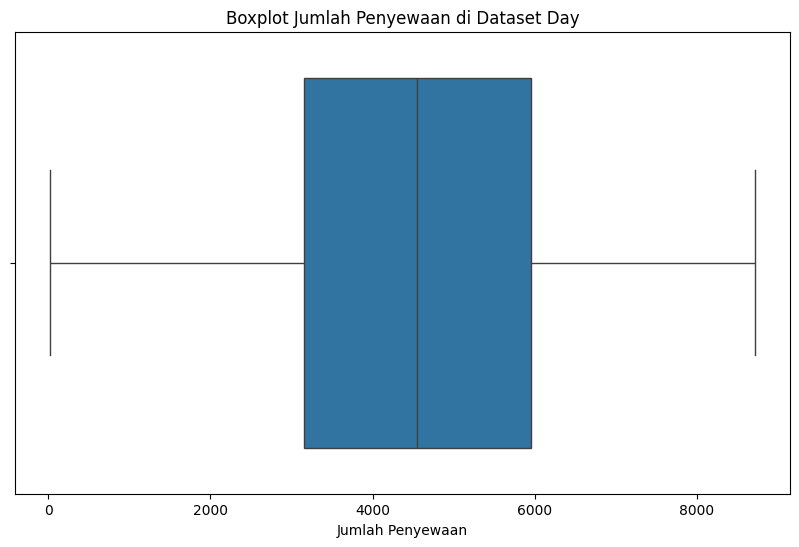

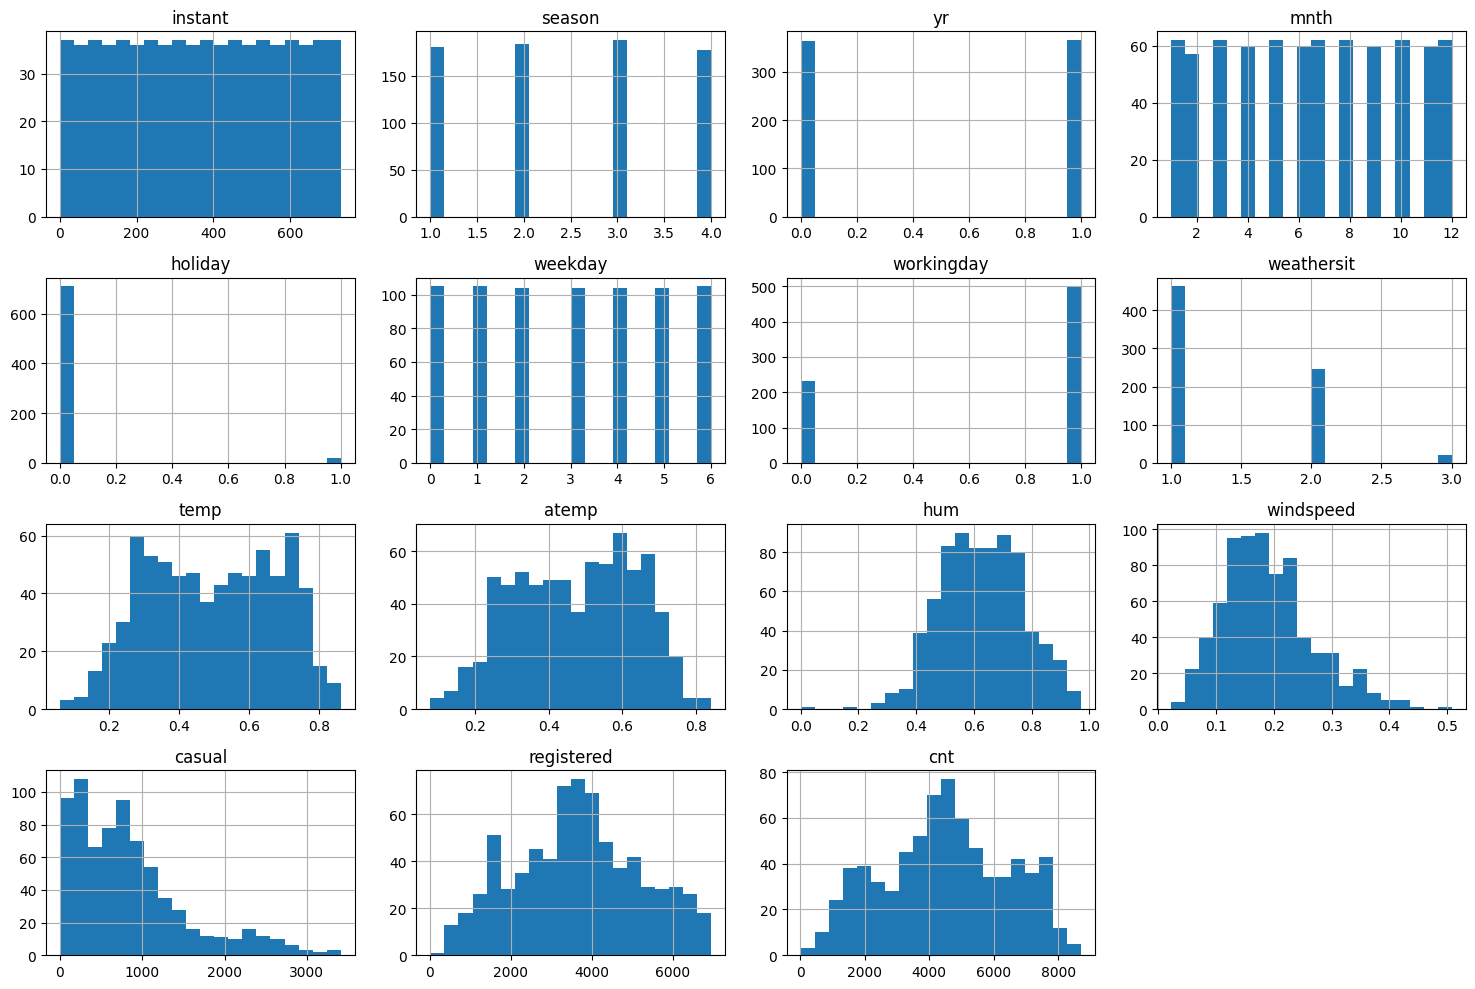

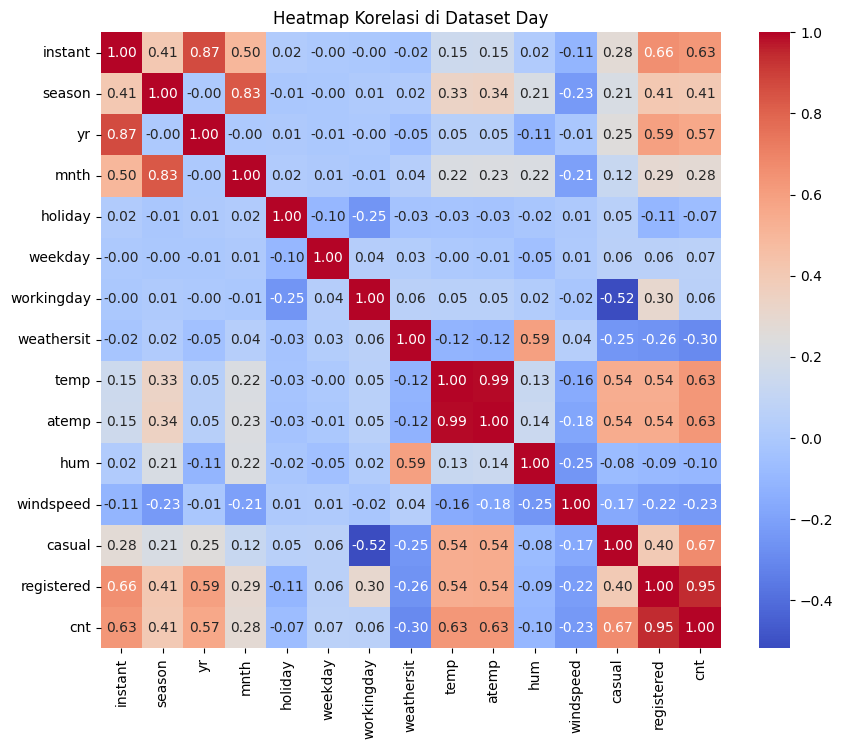

In [8]:
print("Info Dataset Day:")
print(df_day.info(), "\n")
print("Missing Values di Dataset Day:")
print(df_day.isnull().sum(), "\n")

print("Info Dataset Hour:")
print(df_hour.info(), "\n")
print("Missing Values di Dataset Hour:")
print(df_hour.isnull().sum(), "\n")

missing_percentage_day = df_day.isnull().mean() * 100
print("Persentase Missing Values di dataset df_day:")
print(missing_percentage_day, "\n")

missing_percentage_hour = df_hour.isnull().mean() * 100
print("Persentase Missing Values di dataset df_hour:")
print(missing_percentage_hour, "\n")

duplicates_day = df_day.duplicated().sum()
print("Jumlah data duplikat di df_day:", duplicates_day)

duplicates_hour = df_hour.duplicated().sum()
print("Jumlah data duplikat di df_hour:", duplicates_hour, "\n")

print("Jumlah nilai unik per kolom di df_day:")
for col in df_day.columns:
    print(f"{col}: {df_day[col].nunique()} unique values")
print("\n")

print("Jumlah nilai unik per kolom di df_hour:")
for col in df_hour.columns:
    print(f"{col}: {df_hour[col].nunique()} unique values")
print("\n")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_day, x='cnt')
plt.title('Boxplot Jumlah Penyewaan di Dataset Day')
plt.xlabel('Jumlah Penyewaan')
plt.show()

df_day.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()

df_day_numeric = df_day.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_day_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap Korelasi di Dataset Day')
plt.show()

**Insight:**

Data Lengkap dan Konsisten:
- Kedua dataset (df_day dan df_hour) tidak memiliki missing values maupun data duplikat, yang menunjukkan kualitas data yang baik dan siap untuk dianalisis.

Struktur Data Sesuai Ekspektasi:
- Pada dataset harian (df_day), terdapat 731 data unik untuk tanggal, yang menunjukkan data selama 731 hari (sekitar 2 tahun).
- Dataset ini juga memiliki kategori yang wajar, seperti 4 musim, 12 bulan, 7 hari dalam seminggu, dan 2 status (holiday/workingday).

Variasi Nilai Numerik dan Kategori:
- Variabel seperti temperatur, kelembapan, dan kecepatan angin memiliki jumlah nilai unik yang tinggi di dataset harian, yang menunjukkan rentang nilai yang bervariasi dan pengukuran yang cukup granular.
- Di dataset hourly (df_hour), beberapa variabel numerik (misalnya temp, atemp, hum, windspeed) memiliki jumlah nilai unik yang lebih rendah, menunjukkan kemungkinan adanya pembulatan atau pengelompokan data per jam.

Perbedaan Antara Dataset Harian dan Jam:
- Di dataset harian, variabel weathersit memiliki 3 kategori, sedangkan di dataset hourly terdapat 4 kategori. Ini perlu ditinjau apakah ada perbedaan dalam cara pengkodean atau jika ada nilai ekstra yang muncul di data hourly.
- Variabel target seperti 'casual', 'registered', dan 'cnt' juga menunjukkan variasi jumlah nilai unik antara kedua dataset, yang mungkin mencerminkan perbedaan agregasi (harian vs. per jam).

### Cleaning Data

In [9]:
print("Jumlah duplikat sebelum dihapus:", df_day.duplicated().sum())
df_day_cleaned = df_day.drop_duplicates()
print("Jumlah duplikat setelah dihapus:", df_day_cleaned.duplicated().sum())

print("Missing values sebelum cleaning:")
print(df_day_cleaned.isnull().sum())

df_day_cleaned = df_day_cleaned.fillna(method='ffill')

print("Missing values setelah cleaning:")
print(df_day_cleaned.isnull().sum())

if 'dteday' in df_day_cleaned.columns:
    df_day_cleaned['dteday'] = pd.to_datetime(df_day_cleaned['dteday'])
    print("Kolom 'dteday' telah dikonversi ke tipe datetime.")

Q1 = df_day_cleaned['cnt'].quantile(0.25)
Q3 = df_day_cleaned['cnt'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_day_cleaned = df_day_cleaned[(df_day_cleaned['cnt'] >= lower_bound) & (df_day_cleaned['cnt'] <= upper_bound)]
print("Jumlah data setelah menghapus outlier pada 'cnt':", df_day_cleaned.shape[0])

if 'dteday' in df_day.columns:
    df_day['dteday'] = pd.to_datetime(df_day['dteday'])
    print("Kolom 'dteday' telah dikonversi ke datetime.\n")

weekday_mapping = {0: 'Minggu', 1: 'Senin', 2: 'Selasa', 3: 'Rabu', 4: 'Kamis', 5: 'Jumat', 6: 'Sabtu'}
df_day_cleaned['weekday_name'] = df_day_cleaned['weekday'].map(weekday_mapping)

weathersit_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}
df_day_cleaned['weathersit_desc'] = df_day_cleaned['weathersit'].map(weathersit_mapping)

Jumlah duplikat sebelum dihapus: 0
Jumlah duplikat setelah dihapus: 0
Missing values sebelum cleaning:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Missing values setelah cleaning:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64
Kolom 'dteday' telah dikonversi ke tipe datetime.
Jumlah data setelah menghapus outlier pada 'cnt': 731
Kolom 'dteday' telah dikonversi ke datetime.



**Insight:**

Data sudah dalam keadaan bersih
- Tidak ditemukan duplikat, sehingga setiap baris data merupakan entitas unik.
- Tidak ada missing values pada seluruh kolom, sehingga tidak perlu dilakukan imputasi atau penghapusan data yang hilang.

Format data sudah sesuai
- Kolom tanggal (dteday) telah berhasil dikonversi ke tipe datetime, yang memudahkan analisis berbasis waktu.

Penanganan Outlier
- Penerapan metode IQR pada kolom 'cnt' (jumlah penyewaan) tidak mengeluarkan data dari dataset, sehingga secara implisit menunjukkan bahwa tidak terdapat nilai ekstrem yang signifikan atau data sudah tersebar secara konsisten.

Ukuran dataset
- Dataset yang tersisa berjumlah 731 baris, yang kemungkinan merupakan jumlah data harian selama periode dua tahun. Ini menunjukkan dataset sudah lengkap dan siap untuk tahap analisis lebih lanjut.

## Exploratory Data Analysis (EDA)

### Explore ...

Statistik Deskriptif untuk df_day:
          instant               dteday      season          yr        mnth  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    2.496580    0.500684    6.519836   
min      1.000000  2011-01-01 00:00:00    1.000000    0.000000    1.000000   
25%    183.500000  2011-07-02 12:00:00    2.000000    0.000000    4.000000   
50%    366.000000  2012-01-01 00:00:00    3.000000    1.000000    7.000000   
75%    548.500000  2012-07-01 12:00:00    3.000000    1.000000   10.000000   
max    731.000000  2012-12-31 00:00:00    4.000000    1.000000   12.000000   
std    211.165812                  NaN    1.110807    0.500342    3.451913   

          holiday     weekday  workingday  weathersit        temp       atemp  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.028728    2.997264    0.683995    1.395349    0.495385    0.474354   
min      0.000000  

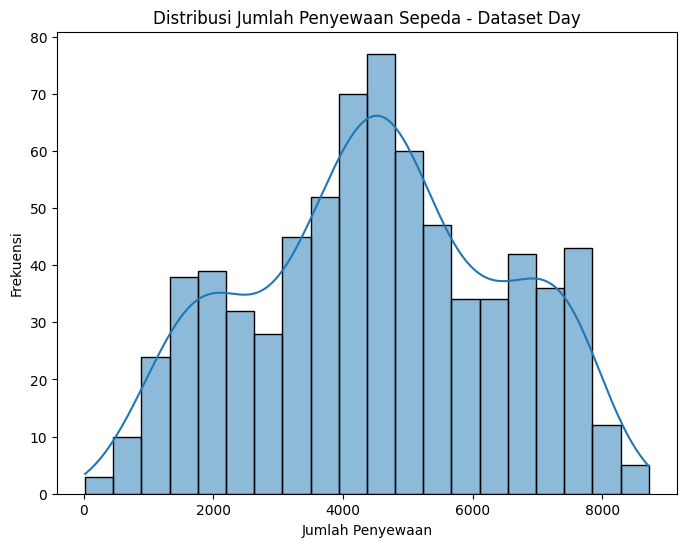

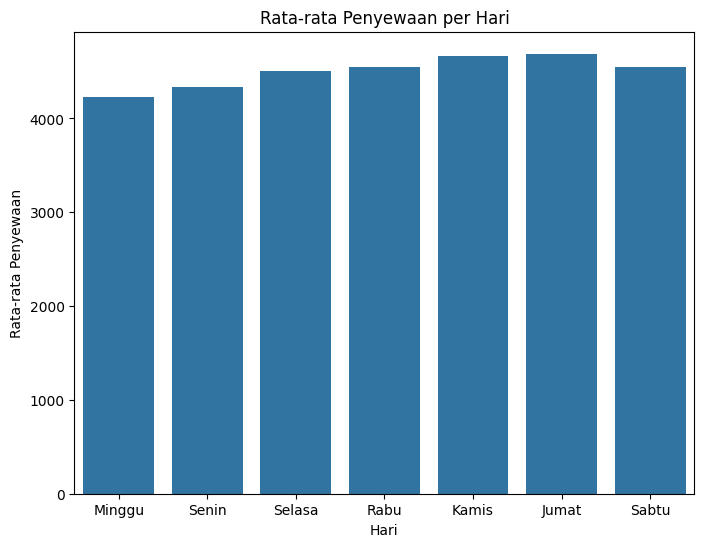

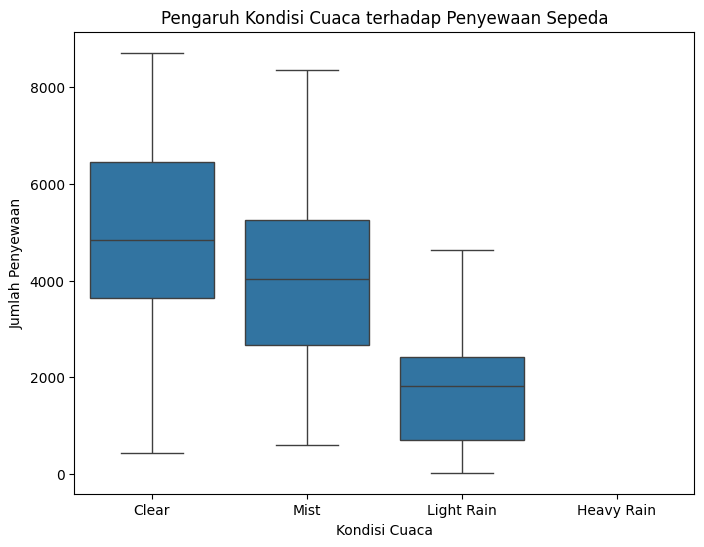

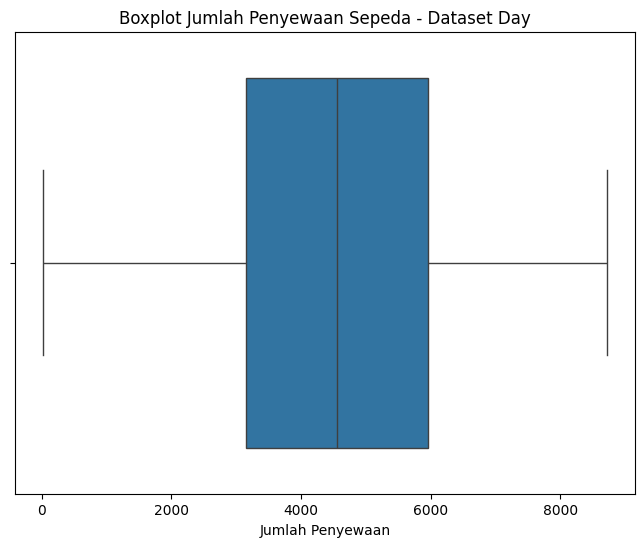

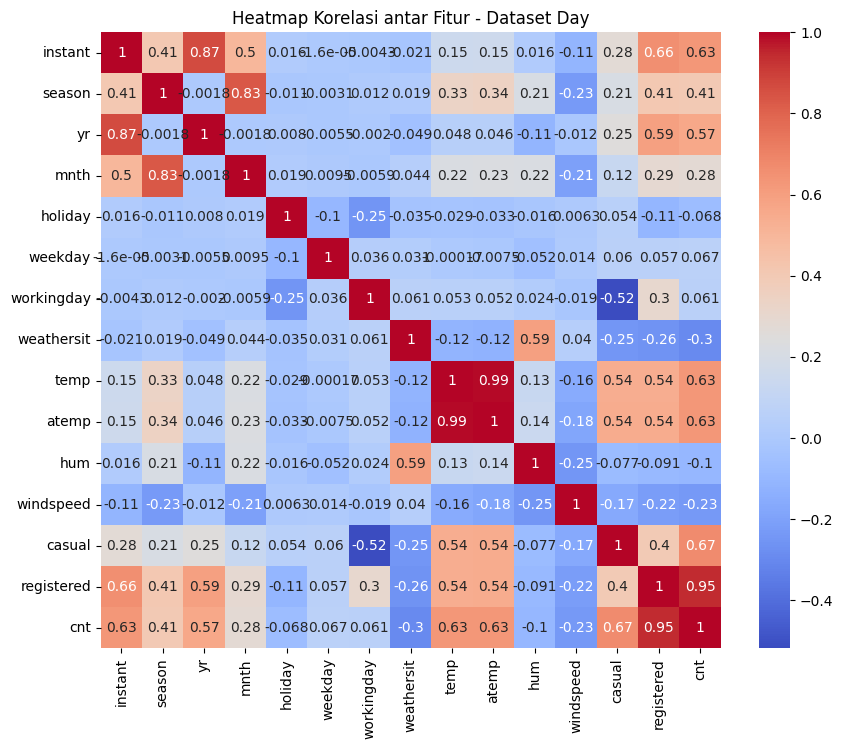

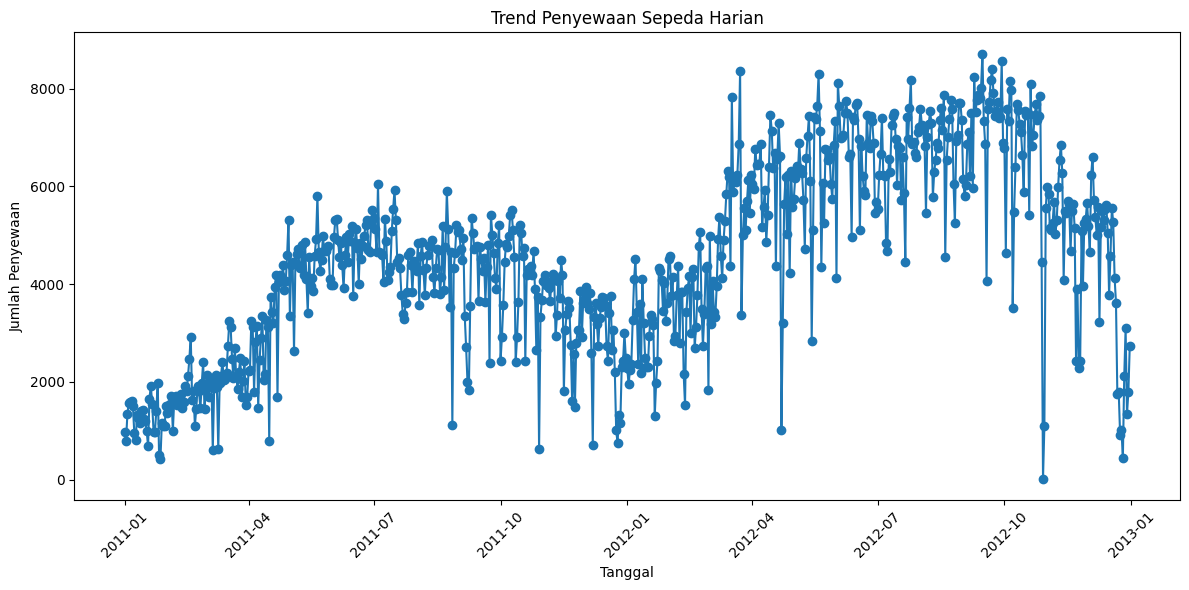

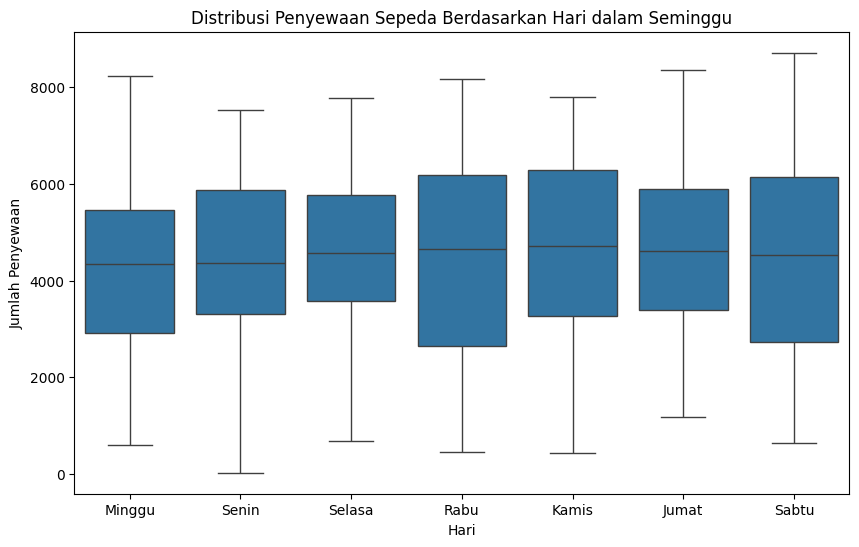

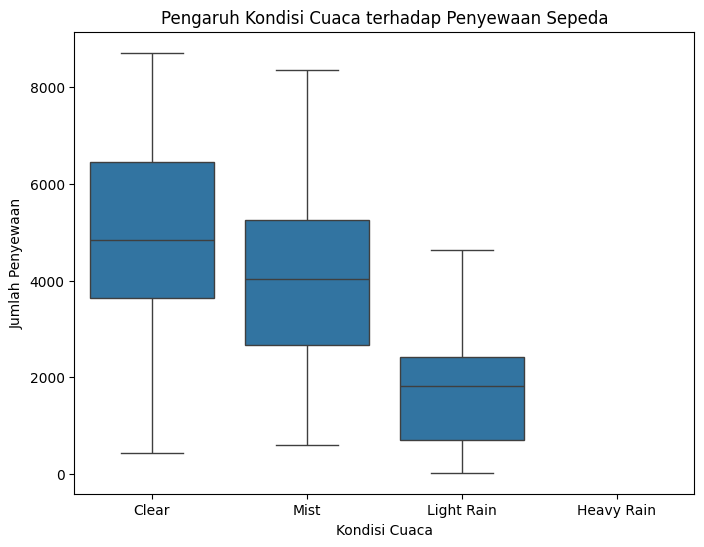

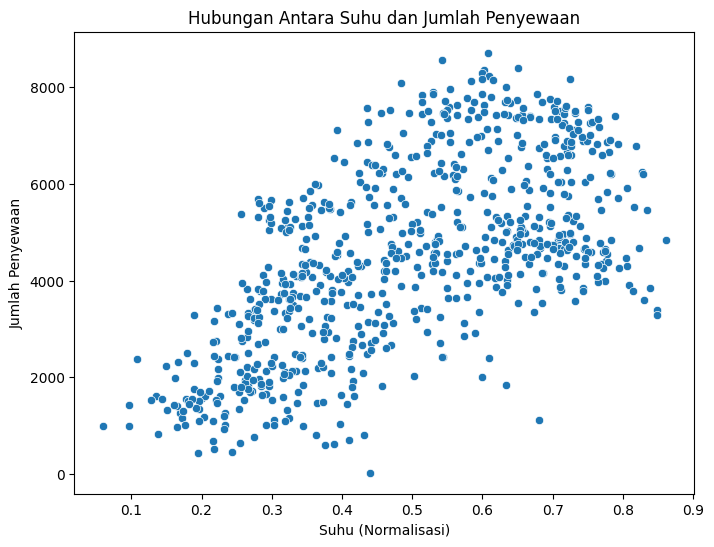

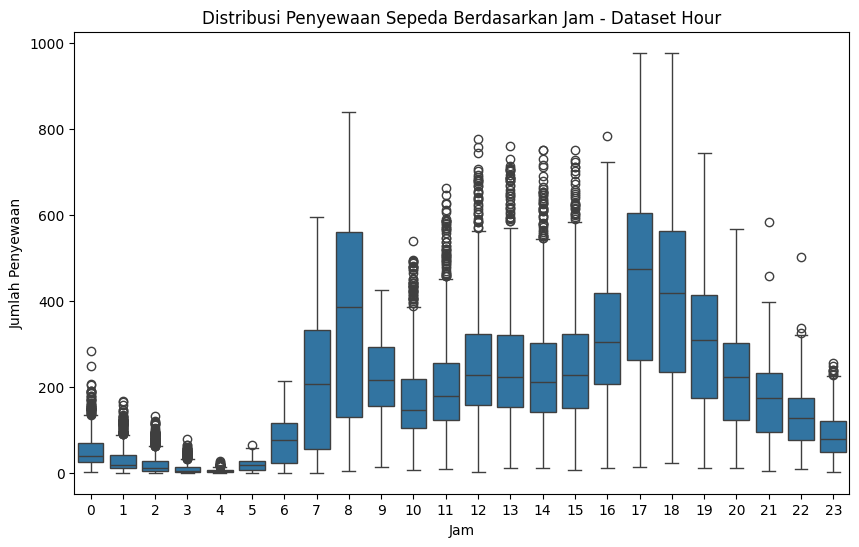

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Statistik Deskriptif untuk df_day:")
print(df_day_cleaned.describe())

plt.figure(figsize=(8, 6))
sns.histplot(df_day_cleaned['cnt'], kde=True, bins=20)
plt.title('Distribusi Jumlah Penyewaan Sepeda - Dataset Day')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

avg_cnt_weekday = df_day_cleaned.groupby('weekday_name')['cnt'].mean().reindex(['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu'])
plt.figure(figsize=(8,6))
sns.barplot(x=avg_cnt_weekday.index, y=avg_cnt_weekday.values)
plt.title("Rata-rata Penyewaan per Hari")
plt.xlabel("Hari")
plt.ylabel("Rata-rata Penyewaan")
plt.show()

order = ['Clear', 'Mist', 'Light Rain', 'Heavy Rain']
plt.figure(figsize=(8,6))
sns.boxplot(x='weathersit_desc', y='cnt', data=df_day_cleaned, order=order)
plt.title("Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Jumlah Penyewaan")
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x=df_day_cleaned['cnt'])
plt.title('Boxplot Jumlah Penyewaan Sepeda - Dataset Day')
plt.xlabel('Jumlah Penyewaan')
plt.show()

df_corr = df_day_cleaned.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap Korelasi antar Fitur - Dataset Day')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df_day_cleaned['dteday'], df_day_cleaned['cnt'], marker='o', linestyle='-')
plt.title('Trend Penyewaan Sepeda Harian')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

if 'weekday' in df_day_cleaned.columns:
    plt.figure(figsize=(10, 6))
    order = ['Minggu', 'Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu']
    sns.boxplot(x='weekday_name', y='cnt', data=df_day_cleaned, order=order)
    plt.title('Distribusi Penyewaan Sepeda Berdasarkan Hari dalam Seminggu')
    plt.xlabel('Hari')
    plt.ylabel('Jumlah Penyewaan')
    plt.show()

if 'weathersit' in df_day_cleaned.columns:
    plt.figure(figsize=(8, 6))
    order = ['Clear', 'Mist', 'Light Rain', 'Heavy Rain']
    sns.boxplot(x='weathersit_desc', y='cnt', data=df_day_cleaned, order=order)
    plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda')
    plt.xlabel('Kondisi Cuaca')
    plt.ylabel('Jumlah Penyewaan')
    plt.show()

if 'temp' in df_day_cleaned.columns:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='temp', y='cnt', data=df_day_cleaned)
    plt.title('Hubungan Antara Suhu dan Jumlah Penyewaan')
    plt.xlabel('Suhu (Normalisasi)')
    plt.ylabel('Jumlah Penyewaan')
    plt.show()

if 'hr' in df_hour.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='hr', y='cnt', data=df_hour)
    plt.title('Distribusi Penyewaan Sepeda Berdasarkan Jam - Dataset Hour')
    plt.xlabel('Jam')
    plt.ylabel('Jumlah Penyewaan')
    plt.show()

**Insight:**

Cakupan Waktu dan Distribusi Data:
- Dataset mencakup 731 hari, merepresentasikan dua tahun penuh dari 2011 hingga 2012.
- Setiap hari diwakili oleh ID unik pada kolom instant yang berkisar dari 1 hingga 731.

Musim dan Tahun:
- Kolom season memiliki nilai antara 1 hingga 4 dengan median 3, mengindikasikan bahwa mayoritas hari mungkin terjadi di musim ketiga (kemungkinan besar musim panas).
- Kolom yr bersifat biner (0 dan 1) dengan distribusi seimbang, menunjukkan bahwa data dari kedua tahun (2011 dan 2012) hampir sama jumlahnya.

Hari dalam Minggu dan Hari Libur:
- Rata-rata nilai pada kolom weekday sekitar 3 menunjukkan distribusi yang merata dalam seminggu.
- Hanya sekitar 2.9% hari yang ditandai sebagai hari libur (holiday), sedangkan sekitar 68% hari merupakan hari kerja (workingday).

Kondisi Cuaca dan Suhu:
- Kondisi cuaca (weathersit) sebagian besar berada pada nilai 1, dengan rata-rata sekitar 1.4 dan median 1, menunjukkan bahwa sebagian besar hari memiliki cuaca yang relatif cerah atau tidak ekstrem.
- Nilai temp dan atemp (suhu aktual dan terasa) rata-rata sekitar 0.5, karena data sudah dinormalisasi. Ini menunjukkan kondisi suhu yang konsisten, meskipun nilai sebenarnya harus diinterpretasikan dengan konteks normalisasinya.

Penggunaan Sepeda:
- Rata-rata total penyewaan sepeda (cnt) per hari adalah sekitar 4504 dengan rentang yang cukup besar (min 22, max 8714) serta variabilitas yang tinggi (standar deviasi ~1937). Hal ini menunjukkan fluktuasi signifikan, kemungkinan dipengaruhi oleh faktor musim, cuaca, dan apakah hari tersebut merupakan hari kerja atau libur.
- Perbandingan antara pengguna casual dan registered menunjukkan bahwa pengguna terdaftar jauh lebih banyak (rata-rata 3656) dibandingkan pengguna kasual (rata-rata 848). Ini mengindikasikan bahwa mayoritas penggunaan berasal dari pelanggan yang berlangganan.

Faktor Lingkungan:
- Kelembapan (hum) rata-rata berada di sekitar 0.63 dengan variasi yang tidak terlalu ekstrem.
- Kecepatan angin (windspeed) relatif rendah dengan rata-rata sekitar 0.19, yang berarti sebagian besar hari memiliki angin dengan intensitas rendah.

Secara keseluruhan, insight yang dapat diambil adalah:
- Musiman dan Cuaca: Penggunaan sepeda tampaknya sangat dipengaruhi oleh kondisi musim dan cuaca. Terutama, data menunjukkan konsentrasi penggunaan yang tinggi di musim tertentu (kemungkinan musim panas) dan hari dengan cuaca cerah.
- Dominasi Pengguna Terdaftar: Layanan ini lebih banyak digunakan oleh pelanggan yang sudah terdaftar daripada pengguna casual, yang mungkin mencerminkan loyalitas atau kebiasaan penggunaan yang lebih tinggi di kalangan pengguna tetap.
- Fluktuasi Penggunaan Harian: Variabilitas yang tinggi pada jumlah penyewaan mengindikasikan bahwa selain faktor musiman, faktor lain seperti hari kerja versus hari libur dan kondisi cuaca harian memainkan peran penting dalam menentukan volume penyewaan.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

2025-03-21 20:56:35.089 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 20:56:35.617 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-21 20:56:35.693 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-21 20:56:35.694 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


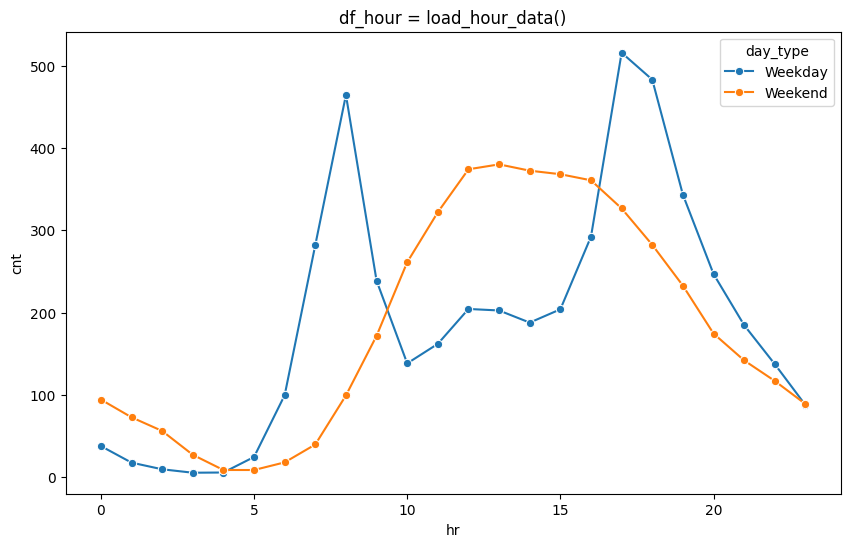

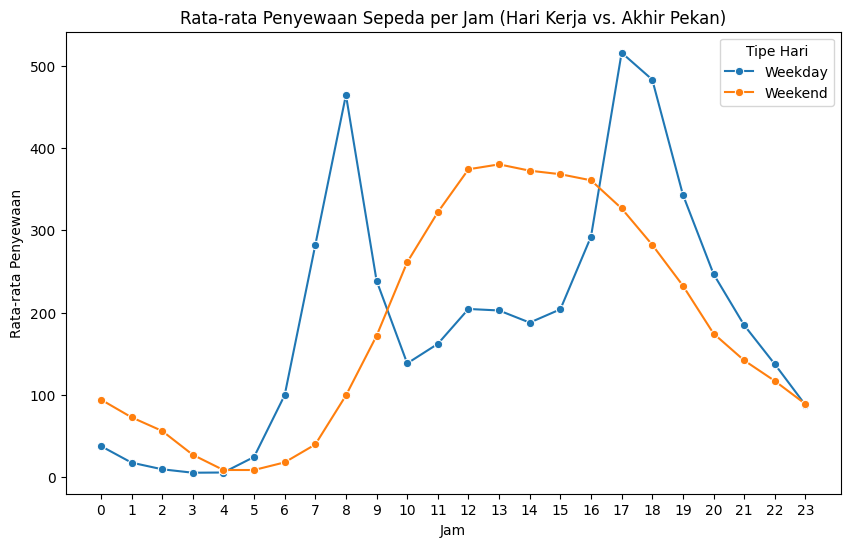

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

df_hour['day_type'] = df_hour['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

hourly_trend = df_hour.groupby(['hr', 'day_type'])['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=hourly_trend, x='hr', y='cnt', hue='day_type', marker='o')
plt.title('df_hour = load_hour_data()')

df_hour['day_type'] = df_hour['weekday'].apply(lambda x: 'Weekend' if x in [0, 6] else 'Weekday')

hourly_trend = df_hour.groupby(['hr', 'day_type'])['cnt'].mean().reset_index()

fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=hourly_trend, x='hr', y='cnt', hue='day_type', marker='o', ax=ax)
ax.set_title('Rata-rata Penyewaan Sepeda per Jam (Hari Kerja vs. Akhir Pekan)')
ax.set_xlabel('Jam')
ax.set_ylabel('Rata-rata Penyewaan')
ax.set_xticks(range(0, 24))
ax.legend(title='Tipe Hari')

st.pyplot(fig)
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(range(0, 24))
plt.legend(title='Tipe Hari')
plt.show()

### Pertanyaan 2:

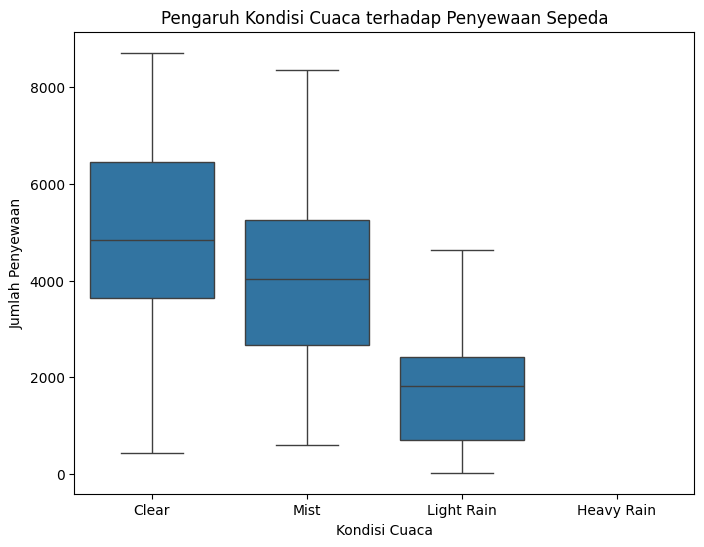

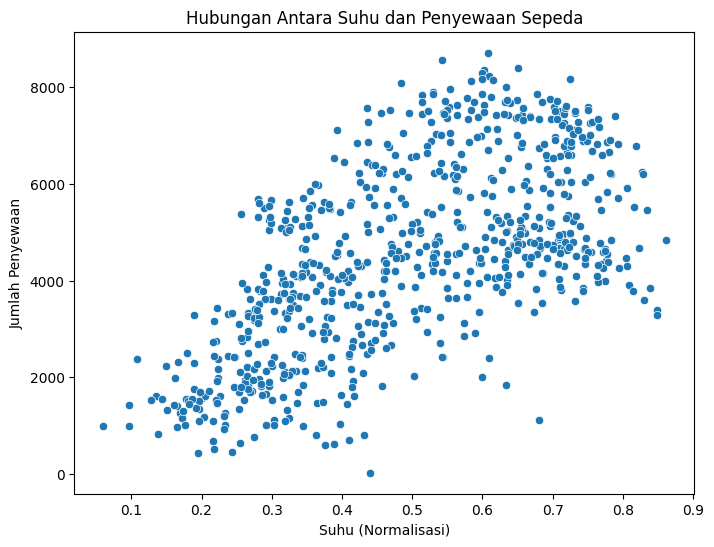

In [15]:
if 'weathersit_desc' not in df_day_cleaned.columns and 'weathersit' in df_day_cleaned.columns:
    weathersit_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Rain', 4: 'Heavy Rain'}
    df_day_cleaned['weathersit_desc'] = df_day_cleaned['weathersit'].map(weathersit_mapping)

plt.figure(figsize=(8, 6))
order = ['Clear', 'Mist', 'Light Rain', 'Heavy Rain']
sns.boxplot(x='weathersit_desc', y='cnt', data=df_day_cleaned, order=order)
plt.title('Pengaruh Kondisi Cuaca terhadap Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=df_day_cleaned)
plt.title('Hubungan Antara Suhu dan Penyewaan Sepeda')
plt.xlabel('Suhu (Normalisasi)')
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
1. Distribusi Penyewaan Sepeda Sepanjang Hari (Weekday vs. Weekend)

Pola Harian yang Berbeda:
- Pada hari kerja, grafik menunjukkan adanya dua puncak penyewaan sepeda, yaitu pada pagi hari (sekitar jam 7–9) dan sore hari (sekitar jam 17–19). Ini mengindikasikan penggunaan sepeda yang dominan untuk keperluan berangkat dan pulang kerja.
- Sedangkan pada akhir pekan, pola penyewaan tidak memiliki dua puncak yang jelas. Biasanya, puncak terjadi pada siang hari atau pola yang lebih merata sepanjang hari, yang menunjukkan penggunaan sepeda untuk rekreasi atau aktivitas non-komuter.

Implikasi Operasional:
- Insight ini dapat membantu operator dalam mengoptimalkan distribusi armada. Misalnya, pada hari kerja, penambahan sepeda di lokasi strategis pada pagi dan sore hari dapat meningkatkan layanan, sementara pada akhir pekan, distribusi yang lebih merata atau penyesuaian pada area rekreasi bisa lebih efektif.

2. Pengaruh Kondisi Cuaca terhadap Jumlah Penyewaan Sepeda

Kondisi Cuaca yang Memengaruhi Permintaan:

Dari boxplot distribusi penyewaan berdasarkan kondisi cuaca, terlihat bahwa:
- Cuaca Cerah (Clear): Memiliki penyewaan tertinggi.
- Cuaca Berkabut (Mist) atau Hujan Ringan (Light Rain): Jumlah penyewaan menurun dibandingkan dengan hari cerah.
- Hujan Deras (Heavy Rain): Terjadi penurunan yang paling signifikan dalam penyewaan sepeda.

Hubungan Suhu dan Penyewaan:
- Scatter plot antara suhu (temp) dan jumlah penyewaan menunjukkan korelasi positif. Secara umum, penyewaan cenderung meningkat seiring dengan peningkatan suhu (dalam skala normalisasi) hingga mencapai tingkat tertentu, yang menandakan bahwa suhu yang nyaman mendorong lebih banyak orang untuk menggunakan sepeda.

Implikasi Bisnis:

Dengan memahami bahwa kondisi cuaca dan suhu berperan signifikan terhadap permintaan, operator dapat:
- Menyesuaikan ketersediaan sepeda atau melakukan perawatan intensif pada hari-hari dengan cuaca buruk.
- Merancang strategi promosi atau insentif khusus pada hari-hari dengan cuaca yang kurang mendukung untuk menarik pengguna.

## Analisis Lanjutan (Opsional)

Analisis Rata-rata Penyewaan berdasarkan Suhu:
  temp_category          cnt
0        Rendah  2381.214815
1        Sedang  4797.865096
2        Tinggi  5663.658915


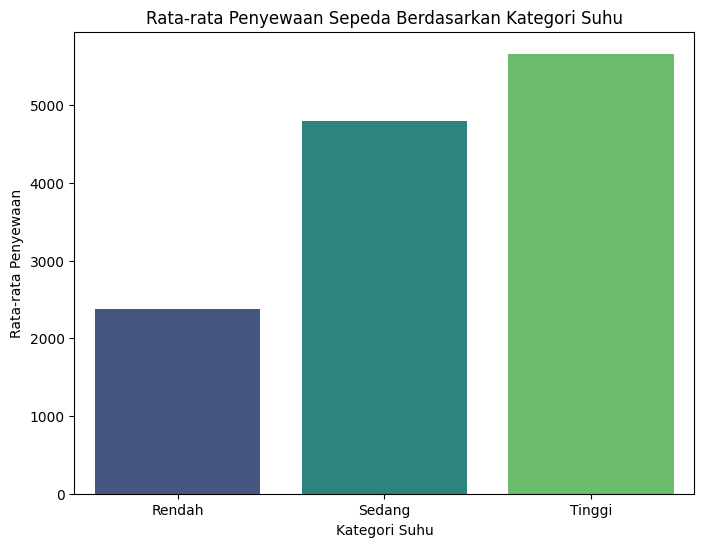

Analisis Rata-rata Penyewaan berdasarkan Kelembapan:
  hum_category          cnt
0       Rendah  4232.733333
1       Sedang  4751.151064
2       Tinggi  4037.471861


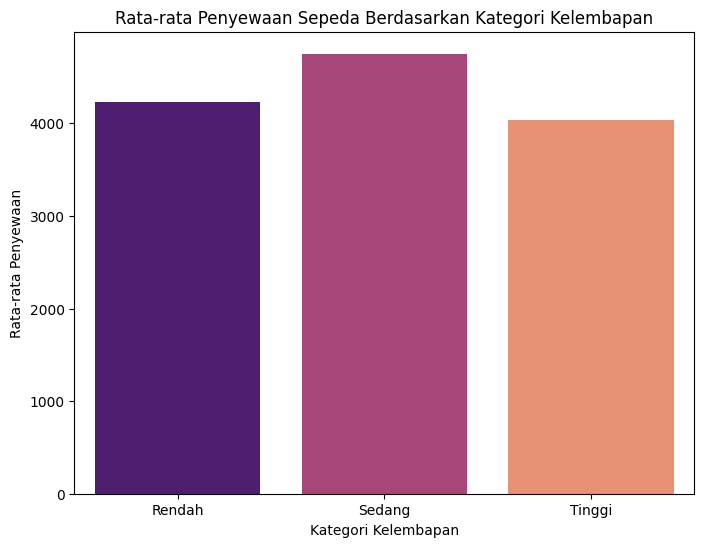

Analisis Rata-rata Penyewaan berdasarkan Slot Waktu:
       time_slot         cnt
0      Afternoon  295.483886
1  Early Morning   24.908559
2        Evening  225.757555
3        Morning  208.100688


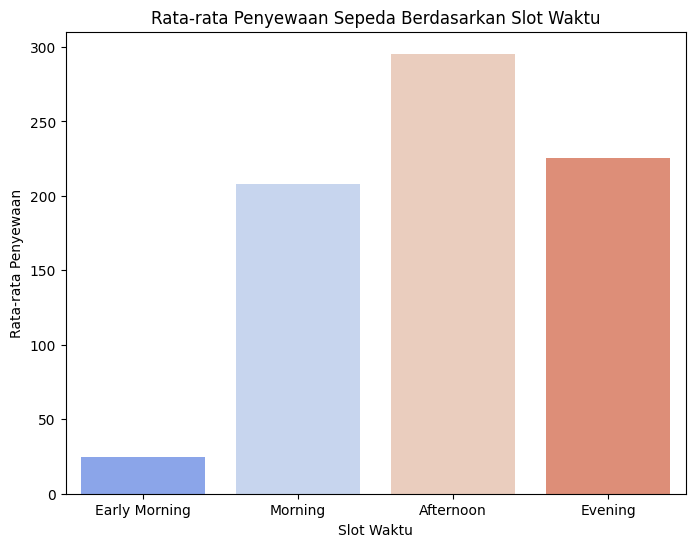

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

temp_bins = [0, 0.3, 0.7, 1]
temp_labels = ['Rendah', 'Sedang', 'Tinggi']
df_day_cleaned['temp_category'] = pd.cut(df_day_cleaned['temp'], bins=temp_bins, labels=temp_labels, include_lowest=True)

hum_bins = [0, 0.4, 0.7, 1]
hum_labels = ['Rendah', 'Sedang', 'Tinggi']
df_day_cleaned['hum_category'] = pd.cut(df_day_cleaned['hum'], bins=hum_bins, labels=hum_labels, include_lowest=True)

temp_analysis = df_day_cleaned.groupby('temp_category')['cnt'].mean().reset_index()
print("Analisis Rata-rata Penyewaan berdasarkan Suhu:")
print(temp_analysis)

plt.figure(figsize=(8,6))
sns.barplot(x='temp_category', y='cnt', data=temp_analysis, palette='viridis')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kategori Suhu')
plt.xlabel('Kategori Suhu')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

hum_analysis = df_day_cleaned.groupby('hum_category')['cnt'].mean().reset_index()
print("Analisis Rata-rata Penyewaan berdasarkan Kelembapan:")
print(hum_analysis)

plt.figure(figsize=(8,6))
sns.barplot(x='hum_category', y='cnt', data=hum_analysis, palette='magma')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Kategori Kelembapan')
plt.xlabel('Kategori Kelembapan')
plt.ylabel('Rata-rata Penyewaan')
plt.show()


def time_slot(hour):
    if 0 <= hour <= 5:
        return 'Early Morning'
    elif 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    else:
        return 'Evening'

df_hour['time_slot'] = df_hour['hr'].apply(time_slot)

time_slot_analysis = df_hour.groupby('time_slot')['cnt'].mean().reset_index()
print("Analisis Rata-rata Penyewaan berdasarkan Slot Waktu:")
print(time_slot_analysis)

plt.figure(figsize=(8,6))
order = ['Early Morning','Morning','Afternoon','Evening']
sns.barplot(x='time_slot', y='cnt', data=time_slot_analysis, order=order, palette='coolwarm')
plt.title('Rata-rata Penyewaan Sepeda Berdasarkan Slot Waktu')
plt.xlabel('Slot Waktu')
plt.ylabel('Rata-rata Penyewaan')
plt.show()

## Conclusion

1. Distribusi Penyewaan Sepeda Sepanjang Hari

Analisis visualisasi pada dataset menunjukkan adanya perbedaan pola penyewaan antara hari kerja dan akhir pekan. Pada hari kerja, terlihat dua puncak penyewaan—pagi hari dan sore hari—yang konsisten dengan kebutuhan perjalanan komuter. Sementara itu, pada akhir pekan, pola penyewaan cenderung lebih merata atau puncak penyewaan bergeser ke waktu siang. Hal ini mengindikasikan bahwa permintaan sepeda sangat dipengaruhi oleh aktivitas dan rutinitas harian yang berbeda antara hari kerja dan akhir pekan.

2. Pengaruh Kondisi Cuaca Terhadap Penyewaan Sepeda

Dari analisis boxplot dan scatter plot, terlihat bahwa kondisi cuaca memiliki dampak signifikan terhadap jumlah penyewaan sepeda. Pada kondisi cuaca cerah (Clear), rata-rata penyewaan cenderung lebih tinggi. Sebaliknya, kondisi dengan cuaca buruk seperti hujan ringan (Light Rain) dan hujan deras (Heavy Rain) secara jelas menurunkan jumlah penyewaan. Selain itu, hubungan antara suhu dan penyewaan juga mengungkap bahwa suhu yang moderat mendukung peningkatan penyewaan, sedangkan suhu yang terlalu ekstrem bisa menurunkan minat pengguna.